In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [51]:
%run _libraries.ipynb

In [52]:
%run _functions.ipynb

In [4]:
dir_current = '04-cv-research'

In [5]:
dir_save_files = 'files/'

In [6]:
dir_load_files = 'files/'

In [7]:
dir_save_img = 'docs/img/'

In [8]:
session_name = dir_current

# Section IV. CV Research

## Load Saved Section if exists

## Load Data

In [9]:
train = loadit('train_preprocessed', dir=dir_load_files)

In [10]:
valid = loadit('valid_preprocessed', dir=dir_load_files)

In [11]:
test = loadit('test_preprocessed', dir=dir_load_files)

In [12]:
cv_results = loadit('cv_results', dir=dir_load_files)

In [13]:
cv0 = cv_results['cv0'].copy()
cv1 = cv_results['cv1'].copy()
cv2 = cv_results['cv2'].copy()
cv3 = cv_results['cv3'].copy()

In [14]:
variables_dict = loadit('variables_dict', dir=dir_load_files)

In [15]:
target = variables_dict['target']
features = variables_dict['features']
order = variables_dict['order']
fourier_period = variables_dict['fourier_period']
fourier_order = variables_dict['fourier_order']
cv_indexes_train = variables_dict['cv_indexes_train']
cv_indexes_eval = variables_dict['cv_indexes_eval']

In [16]:
if os.path.exists(dir_load_files + 'cv4.pkl'):
    cv4 = loadit('cv4', dir=dir_load_files)
    print('CV results loaded')
else:
    print("CV results not found")

CV results loaded


## Cross-validation 3: Base Model

- Model: ARIMA (2, 1, 1)(144)(4)
- Train: February - June
- Eval: March - July

In [17]:
%%time
if 'cv4' in globals():
    cv4_results_df_raw = cv4.copy()
else:
    cv4_results_df_raw = cv_arima_evaluation(
        data=train,
        target=target,
        features=features,
        cv_indexes_train=cv_indexes_train,
        cv_indexes_eval=cv_indexes_eval,
        model_order=order,
        fourier_preiod=fourier_period,
        fourier_order=fourier_order)

CPU times: user 1.03 ms, sys: 1.14 ms, total: 2.17 ms
Wall time: 1.72 ms


In [18]:
cv4_results_df = cv4_results_df_raw.copy()

In [19]:
cv4_results_df['resid_diff'] = cv4_results_df['resid'].diff(1)

In [20]:
cv4_results_df['resid_return'] = cv4_results_df['resid'].pct_change(1).mul(100)

In [21]:
cv4_results_df['resid_rolling_1h'] =  cv4_results_df['resid'].rolling(6).median()

In [22]:
cv4_results_df['resid_rolling_6h'] =  cv4_results_df['resid'].rolling(72).median()

## CV Results Visualization

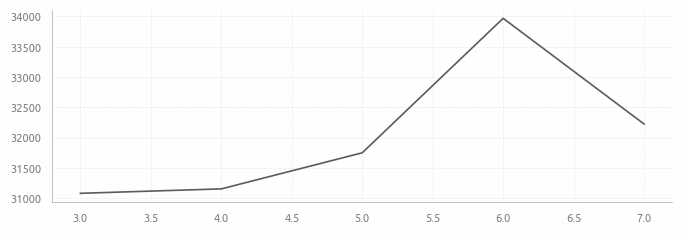

In [133]:
plt.plot(cv4_results_df.groupby(cv4_results_df.index.month)['pred'].mean());

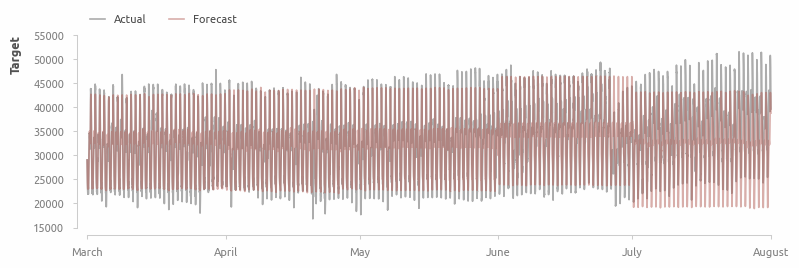

Images 'cv_results_base.png' and 'cv_results_base.svg' successfully saved into 'docs/img/' directory


In [167]:
fig = plt.figure(figsize=(9, 2.5))

plt.plot(
    cv4_results_df.loc['2017-03-01':, 'true'],
    color=palette[0], alpha=0.5, label='Actual')
plt.plot(
    cv4_results_df.loc[:, 'pred'],
    color=palette[1], alpha=0.5, label='Forecast')
axis_rstyle(offset_left=2.5, offset_bottom=5)
axis_formatter_locator('%B')

plt.legend(**legend_inline(), handlelength=1.35)
plt.ylabel('Target')
plt.show()

savefig('cv_results_base', dir_save_img)

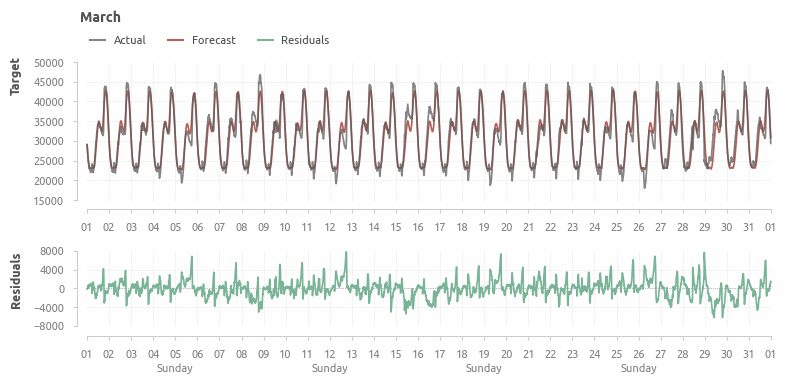

Images 'cv_detail_plot_march.png' and 'cv_detail_plot_march.svg' successfully saved into 'docs/img/' directory


In [166]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-03'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='line',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('March', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_march', dir_save_img)

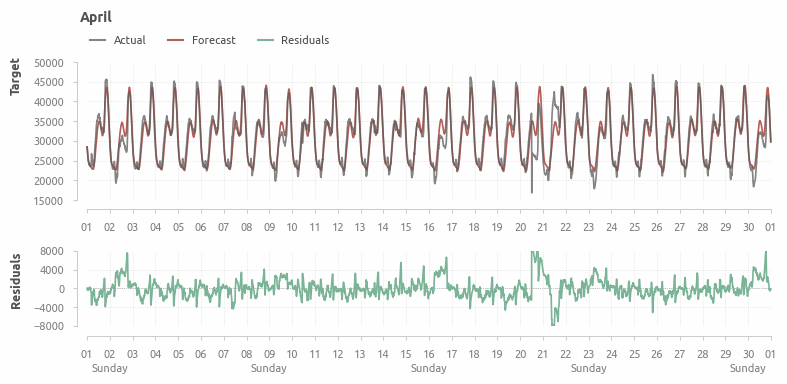

Images 'cv_detail_plot_april.png' and 'cv_detail_plot_april.svg' successfully saved into 'docs/img/' directory


In [168]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-04'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='line',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('April', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_april', dir_save_img)

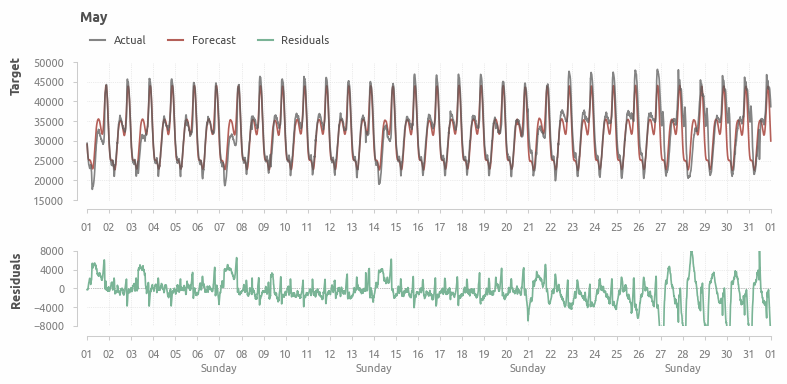

Images 'cv_detail_plot_may.png' and 'cv_detail_plot_may.svg' successfully saved into 'docs/img/' directory


In [169]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-05'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='line',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('May', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_may', dir_save_img)

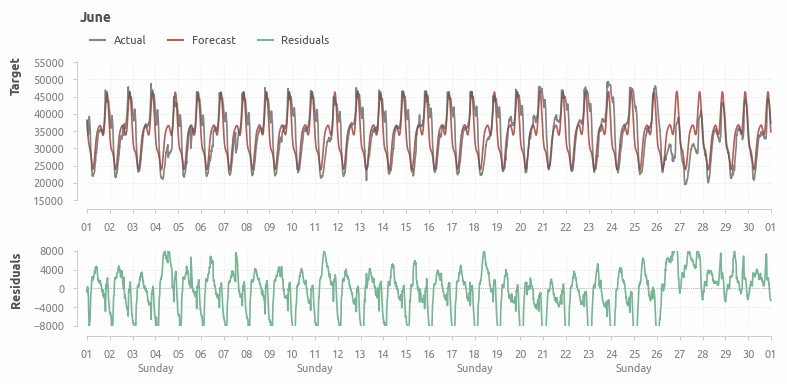

Images 'cv_detail_plot_june.png' and 'cv_detail_plot_june.svg' successfully saved into 'docs/img/' directory


In [170]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-06'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='line',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('June', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_june', dir_save_img)

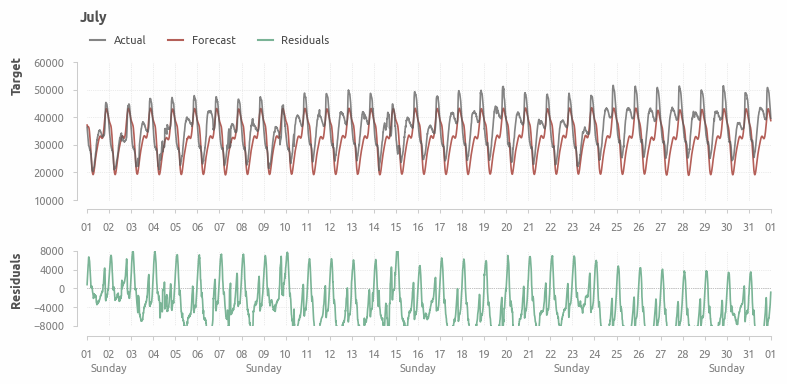

Images 'cv_detail_plot_july.png' and 'cv_detail_plot_july.svg' successfully saved into 'docs/img/' directory


In [171]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-07'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='line',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('July', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_july', dir_save_img)

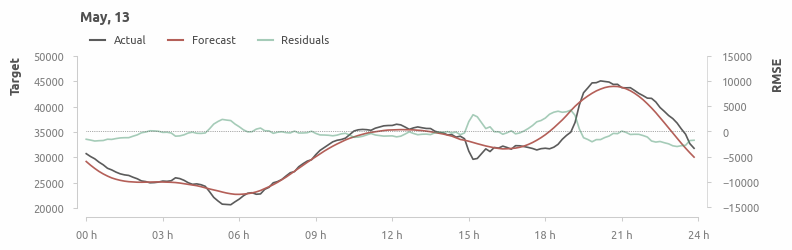

Images 'cv_actual_forecast_day_may.png' and 'cv_actual_forecast_day_may.svg' successfully saved into 'docs/img/' directory


In [165]:
fig = plt.figure(figsize=(8, 2))
ax = ax_current()

ax.set_ylabel('Target')
ax.plot(
    cv4_results_df.loc['2017-05-13', 'true'],
    color=palette[0], label='Actual')
ax.plot(
    cv4_results_df.loc['2017-05-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(offset_bottom=5, offset_left=2.5, yticks=[20000, 50000, 5000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.set_ylim(-15500, 15000)
ax2.spines['right'].set_bounds(-15000, 15000)
# ax2.axhline(0, lw=0.5, ls=':', color=palette[-5])
plot_zeroline(ax=ax2)
ax2.plot(
    cv4_results_df.loc['2017-05-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='line',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.title('May, 13', **title_inline)
plt.show()

savefig('cv_actual_forecast_day_may', dir_save_img)

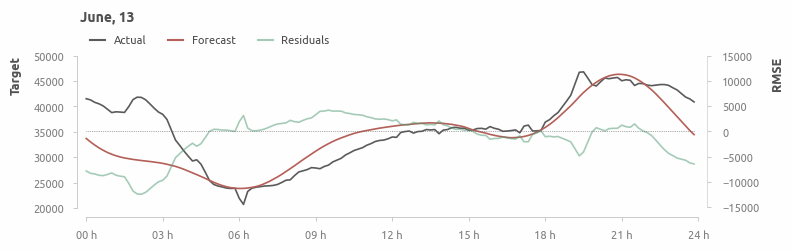

Images 'cv_actual_forecast_day_june.png' and 'cv_actual_forecast_day_june.svg' successfully saved into 'docs/img/' directory


In [164]:
fig = plt.figure(figsize=(8, 2))
ax = ax_current()

ax.set_ylabel('Target')
ax.plot(
    cv4_results_df.loc['2017-06-13', 'true'],
    color=palette[0], label='Actual')
ax.plot(
    cv4_results_df.loc['2017-06-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(offset_bottom=5, offset_left=2.5, yticks=[20000, 50000, 5000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.set_ylim(-15500, 15000)
ax2.spines['right'].set_bounds(-15000, 15000)
# ax2.axhline(0, lw=0.5, ls=':', color=palette[-5])
plot_zeroline(ax=ax2)
ax2.plot(
    cv4_results_df.loc['2017-06-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='line',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.title('June, 13', **title_inline)
plt.show()

savefig('cv_actual_forecast_day_june', dir_save_img)

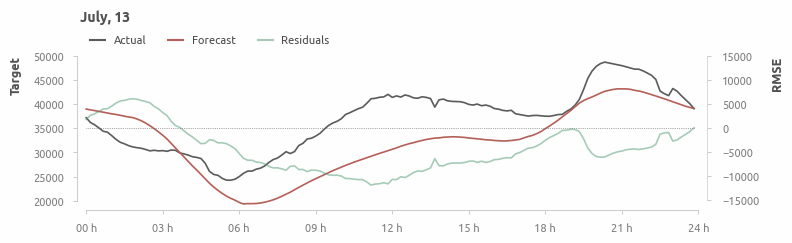

Images 'cv_actual_forecast_day_july.png' and 'cv_actual_forecast_day_july.svg' successfully saved into 'docs/img/' directory


In [163]:
fig = plt.figure(figsize=(8, 2))
ax = ax_current()

ax.set_ylabel('Target')
ax.plot(
    cv4_results_df.loc['2017-07-13', 'true'],
    color=palette[0], label='Actual')
ax.plot(
    cv4_results_df.loc['2017-07-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(offset_bottom=0, offset_left=2.5, yticks=[20000, 50000, 5000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.set_ylim(-17000, 15000)
ax2.spines['right'].set_bounds(-15000, 15000)
# ax2.axhline(0, lw=0.5, ls=':', color=palette[-5])
plot_zeroline()
ax2.plot(
    cv4_results_df.loc['2017-07-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='line',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.title('July, 13', **title_inline)
plt.show()

savefig('cv_actual_forecast_day_july', dir_save_img)

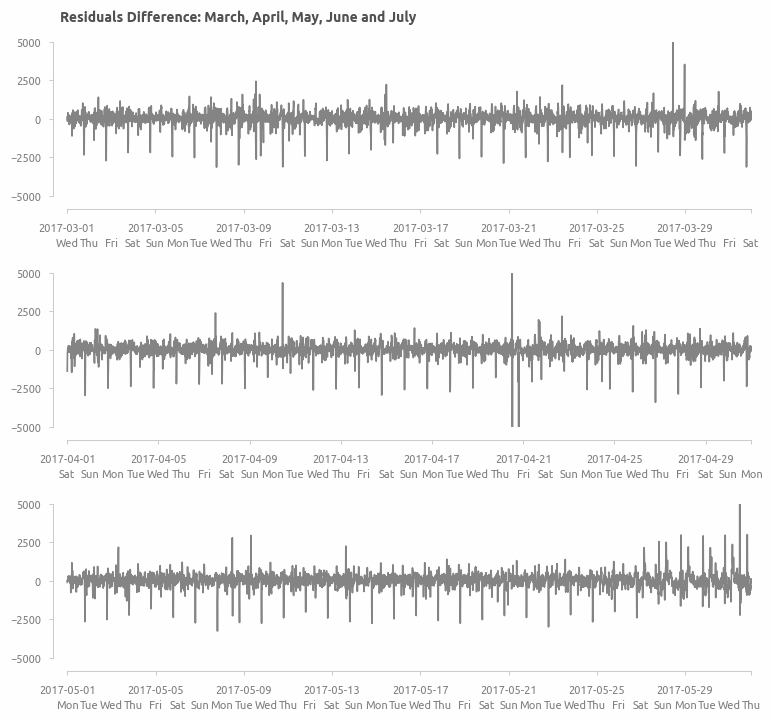

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(9, 8))

ax[0].set_title('Residuals Difference: March, April, May, June and July')

ax[0].plot(
    cv4_results_df.loc['2017-03-01':'2017-03-31', 'resid_diff'], color=palette[0], alpha=0.75)
axis_rstyle(ax=ax[0], yticks=[-5000, 5000, 2500], ylim=[-5000, 5000])
ax0_sec = axis_secondary(ax=ax[0])
ax0_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%a'))
ax0_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[1].plot(
    cv4_results_df.loc['2017-04-01':'2017-04-30', 'resid_diff'], color=palette[0], alpha=0.75)
axis_rstyle(ax=ax[1], yticks=[-5000, 5000, 2500], ylim=[-5000, 5000])
ax1_sec = axis_secondary(ax=ax[1])
ax1_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%a'))
ax1_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[1].xaxis.get_major_ticks()[-1].label1.set_visible(False)

ax[2].plot(
    cv4_results_df.loc['2017-05-01':'2017-05-31', 'resid_diff'], color=palette[0], alpha=0.75)
axis_rstyle(ax=ax[2], yticks=[-5000, 5000, 2500], ylim=[-5000, 5000])
ax2_sec = axis_secondary(ax=ax[2])
ax2_sec.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%a'))
ax2_sec.xaxis.set_major_locator(mpl.dates.DayLocator())
ax[2].xaxis.get_major_ticks()[-1].label1.set_visible(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

# savefig('cv_results_close2', dir_save_img)

In [31]:
cv4_results_df.loc['2017-03-01':'2017-03-10', 'resid_diff'].rolling(2).sum()

2017-03-01 00:00:00           NaN
2017-03-01 00:10:00           NaN
2017-03-01 00:20:00     15.350771
2017-03-01 00:30:00    249.275589
2017-03-01 00:40:00    -33.986234
                          ...    
2017-03-10 23:10:00    223.738829
2017-03-10 23:20:00    160.728391
2017-03-10 23:30:00    466.116290
2017-03-10 23:40:00    336.298345
2017-03-10 23:50:00    -23.331108
Freq: 10min, Name: resid_diff, Length: 1440, dtype: float64

In [32]:
cv4_results_df.loc['2017-03-01':'2017-03-10', 'resid_diff']

2017-03-01 00:00:00           NaN
2017-03-01 00:10:00   -135.906023
2017-03-01 00:20:00    151.256794
2017-03-01 00:30:00     98.018795
2017-03-01 00:40:00   -132.005030
                          ...    
2017-03-10 23:10:00    -68.454009
2017-03-10 23:20:00    229.182400
2017-03-10 23:30:00    236.933890
2017-03-10 23:40:00     99.364454
2017-03-10 23:50:00   -122.695563
Freq: 10min, Name: resid_diff, Length: 1440, dtype: float64

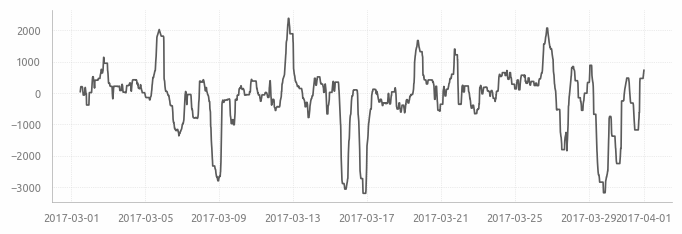

In [33]:
plt.plot(
    cv4_results_df.loc['2017-03', 'resid'].rolling(72).median(), color=palette[0])

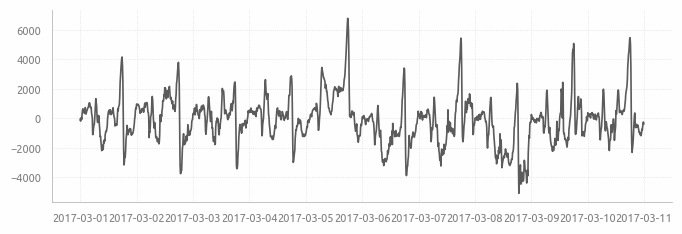

In [34]:
plt.plot(
    cv4_results_df.loc['2017-03-01':'2017-03-10', 'resid'], color=palette[0])

## Save Data

In [35]:
saveit(cv4_results_df_raw, 'cv4', dir_save_files)

File 'cv4.pkl' saved in directory 'files/'


### Execution time

In [36]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:01:37
